## Import statements

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, SubsetRandomSampler
import torchvision
from torchvision import transforms
import os
from datetime import datetime  # For generating timestamped folder names
from model import *
from data import *
from utils import *
from train import *
from tqdm.auto import tqdm
import os

# Check if GPU is available, otherwise use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Hyperparameters & Dataset loading

In [11]:
params = {
    'batch_size': 128,
    'learning_rate': 0.01,
    'save_dir': 'model_ckpts',
    'weight_decay': 1e-4,
    'grad_clip': 0.1,
}

In [12]:
#Normal case
train_data_loader = create_train_data_loader(params["batch_size"])

#num instances ranging from 1,10,100,1000
train_data_num_1_loader = create_train_data_loader_with_num_instances(1, params["batch_size"])
train_data_num_10_loader = create_train_data_loader_with_num_instances(10, params["batch_size"])
train_data_num_100_loader = create_train_data_loader_with_num_instances(100, params["batch_size"])
train_data_num_1000_loader = create_train_data_loader_with_num_instances(1000, params["batch_size"])

#Testing and validation for all cases
test_data_loader, validation_data_loader = create_test_and_validation_data_loader(params["batch_size"])


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [13]:
def get_model_weight_path(experiment, epoch_num=None):
    directory = os.path.join(params["save_dir"], experiment)
    if epoch_num == None:
        # Get a list of all files in the directory
        files = os.listdir(directory)

        # Filter out only the files (exclude directories)
        files = [f for f in files if os.path.isfile(os.path.join(directory, f))]

        # Sort the files by their modification time in descending order (most recent first)
        files.sort(key=lambda x: os.path.getmtime(os.path.join(directory, x)), reverse=True)

        # Get the name of the most recently added file
        model_file = files[0] if files else None
    else:
        model_file = f"model_epoch_{epoch_num}.pt"
    return os.path.join(directory, model_file)


# <u>Experiment 1: Full dataset</u>

### 1.1 Train the model

In [14]:
full_experiment = "full"
full_cifar_model = CIFARClassifier()
full_cifar_model.to(device)

CIFARClassifier(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (res2): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv3): Sequent

In [15]:
checkpoint = get_model_weight_path(full_experiment)
checkpoint

'model_ckpts\\full\\model_epoch_3.pt'

In [16]:
full_epoch_numbers, full_training_losses, full_training_accuracy, full_validation_losses, full_validation_accuracy = train_model(
    full_cifar_model,
    train_data_loader,
    validation_data_loader,
    5,
    params,
    full_experiment,
    epoch_saver_count=1,
    resume_checkpoint=checkpoint
)

Model checkpoint model_ckpts\full\model_epoch_3.pt loaded! Will resume the epochs from number #3


Total Epochs: 0.0% |          | 0/5 [00:00<?, ?it/s]

Epoch 4/8:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 4: train_loss: 0.5560596749148405 | train_accuracy: 0.81729 | val_loss: 0.9428276618321737 | val_accuracy: 0.692 
Going to save model @ Epoch:4
Save checkpointed the model at the path model_ckpts\full\model_epoch_4.pt


Epoch 5/8:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 5: train_loss: 0.7795559419390491 | train_accuracy: 0.74532 | val_loss: 0.8275590091943741 | val_accuracy: 0.7246666666666667 
Going to save model @ Epoch:5
Save checkpointed the model at the path model_ckpts\full\model_epoch_5.pt


Epoch 6/8:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 6: train_loss: 0.6964977306249501 | train_accuracy: 0.77395 | val_loss: 0.6716544429461161 | val_accuracy: 0.78 
Going to save model @ Epoch:6
Save checkpointed the model at the path model_ckpts\full\model_epoch_6.pt


Epoch 7/8:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 7: train_loss: 0.515797313026455 | train_accuracy: 0.82971 | val_loss: 0.43653594702482224 | val_accuracy: 0.8626666666666667 
Going to save model @ Epoch:7
Save checkpointed the model at the path model_ckpts\full\model_epoch_7.pt


Epoch 8/8:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 8: train_loss: 0.33194947247500617 | train_accuracy: 0.88992 | val_loss: 0.33239054804046947 | val_accuracy: 0.894 
Going to save model @ Epoch:8
Save checkpointed the model at the path model_ckpts\full\model_epoch_8.pt


### Training for 3 more epochs

In [41]:
checkpoint = get_model_weight_path(full_experiment)
checkpoint

'model_ckpts\\full\\model_epoch_26.pt'

In [42]:
full_epoch_numbers, full_training_losses, full_training_accuracy, full_validation_losses, full_validation_accuracy = train_model(
    full_cifar_model,
    train_data_loader,
    validation_data_loader,
    10,
    params,
    full_experiment,
    epoch_saver_count=1,
    resume_checkpoint=checkpoint
)

Model checkpoint model_ckpts\full\model_epoch_26.pt loaded! Will resume the epochs from number #26


Total Epochs: 0.0% |          | 0/10 [00:00<?, ?it/s]

Epoch 27/36:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 27: train_loss: 0.2871248465498238 | train_accuracy: 0.90628 | val_loss: 0.4187946133315563 | val_accuracy: 0.872 
Going to save model @ Epoch:27
Save checkpointed the model at the path model_ckpts\full\model_epoch_27.pt


Epoch 28/36:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 28: train_loss: 0.43852435338222767 | train_accuracy: 0.85589 | val_loss: 0.585712139805158 | val_accuracy: 0.8233333333333334 
Going to save model @ Epoch:28
Save checkpointed the model at the path model_ckpts\full\model_epoch_28.pt


Epoch 29/36:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 29: train_loss: 0.5861884317815761 | train_accuracy: 0.81105 | val_loss: 0.6018347317973772 | val_accuracy: 0.8146666666666667 
Going to save model @ Epoch:29
Save checkpointed the model at the path model_ckpts\full\model_epoch_29.pt


Epoch 30/36:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 30: train_loss: 0.6072755540575823 | train_accuracy: 0.80406 | val_loss: 0.6466673662265142 | val_accuracy: 0.7846666666666666 
Going to save model @ Epoch:30
Save checkpointed the model at the path model_ckpts\full\model_epoch_30.pt


Epoch 31/36:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 31: train_loss: 0.5693585203431756 | train_accuracy: 0.81427 | val_loss: 0.6051738634705544 | val_accuracy: 0.806 
Going to save model @ Epoch:31
Save checkpointed the model at the path model_ckpts\full\model_epoch_31.pt


Epoch 32/36:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 32: train_loss: 0.519398749827424 | train_accuracy: 0.83067 | val_loss: 0.5293100997805595 | val_accuracy: 0.8293333333333334 
Going to save model @ Epoch:32
Save checkpointed the model at the path model_ckpts\full\model_epoch_32.pt


Epoch 33/36:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 33: train_loss: 0.44662675436805277 | train_accuracy: 0.85328 | val_loss: 0.4034501984715462 | val_accuracy: 0.87 
Going to save model @ Epoch:33
Save checkpointed the model at the path model_ckpts\full\model_epoch_33.pt


Epoch 34/36:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 34: train_loss: 0.35935673287228853 | train_accuracy: 0.8809 | val_loss: 0.35937027384837467 | val_accuracy: 0.88 
Going to save model @ Epoch:34
Save checkpointed the model at the path model_ckpts\full\model_epoch_34.pt


Epoch 35/36:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 35: train_loss: 0.27873318317486806 | train_accuracy: 0.90798 | val_loss: 0.32479702681303024 | val_accuracy: 0.8933333333333333 
Going to save model @ Epoch:35
Save checkpointed the model at the path model_ckpts\full\model_epoch_35.pt


Epoch 36/36:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 36: train_loss: 0.22891704030239673 | train_accuracy: 0.92543 | val_loss: 0.32250479857126874 | val_accuracy: 0.8953333333333333 
Going to save model @ Epoch:36
Save checkpointed the model at the path model_ckpts\full\model_epoch_36.pt


### 1.2 Test the model

In [46]:
full_cifar_test_accuracy, full_cifar_test_loss = perform_test(nn.CrossEntropyLoss(), device, full_cifar_model, test_data_loader)
print(f"Test loss: {full_cifar_test_loss} | Test accuracy: {full_cifar_test_accuracy}")

Test loss: 0.3408265669844044 | Test accuracy: 0.8917647058823529


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


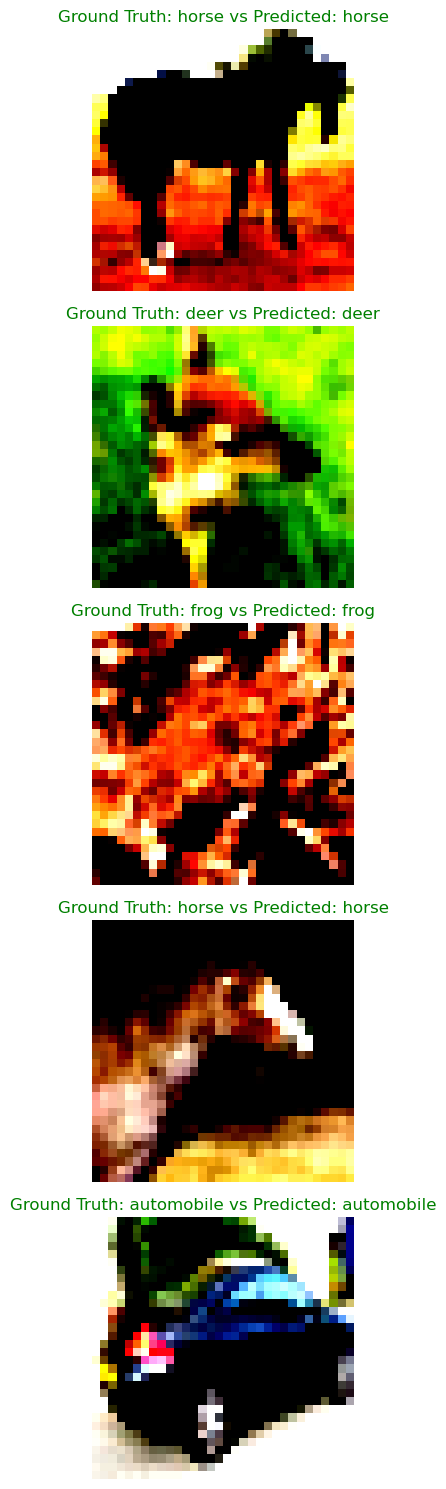

In [44]:
show_predictions(full_cifar_model, test_data_loader)

### 1.3 Plot graphs

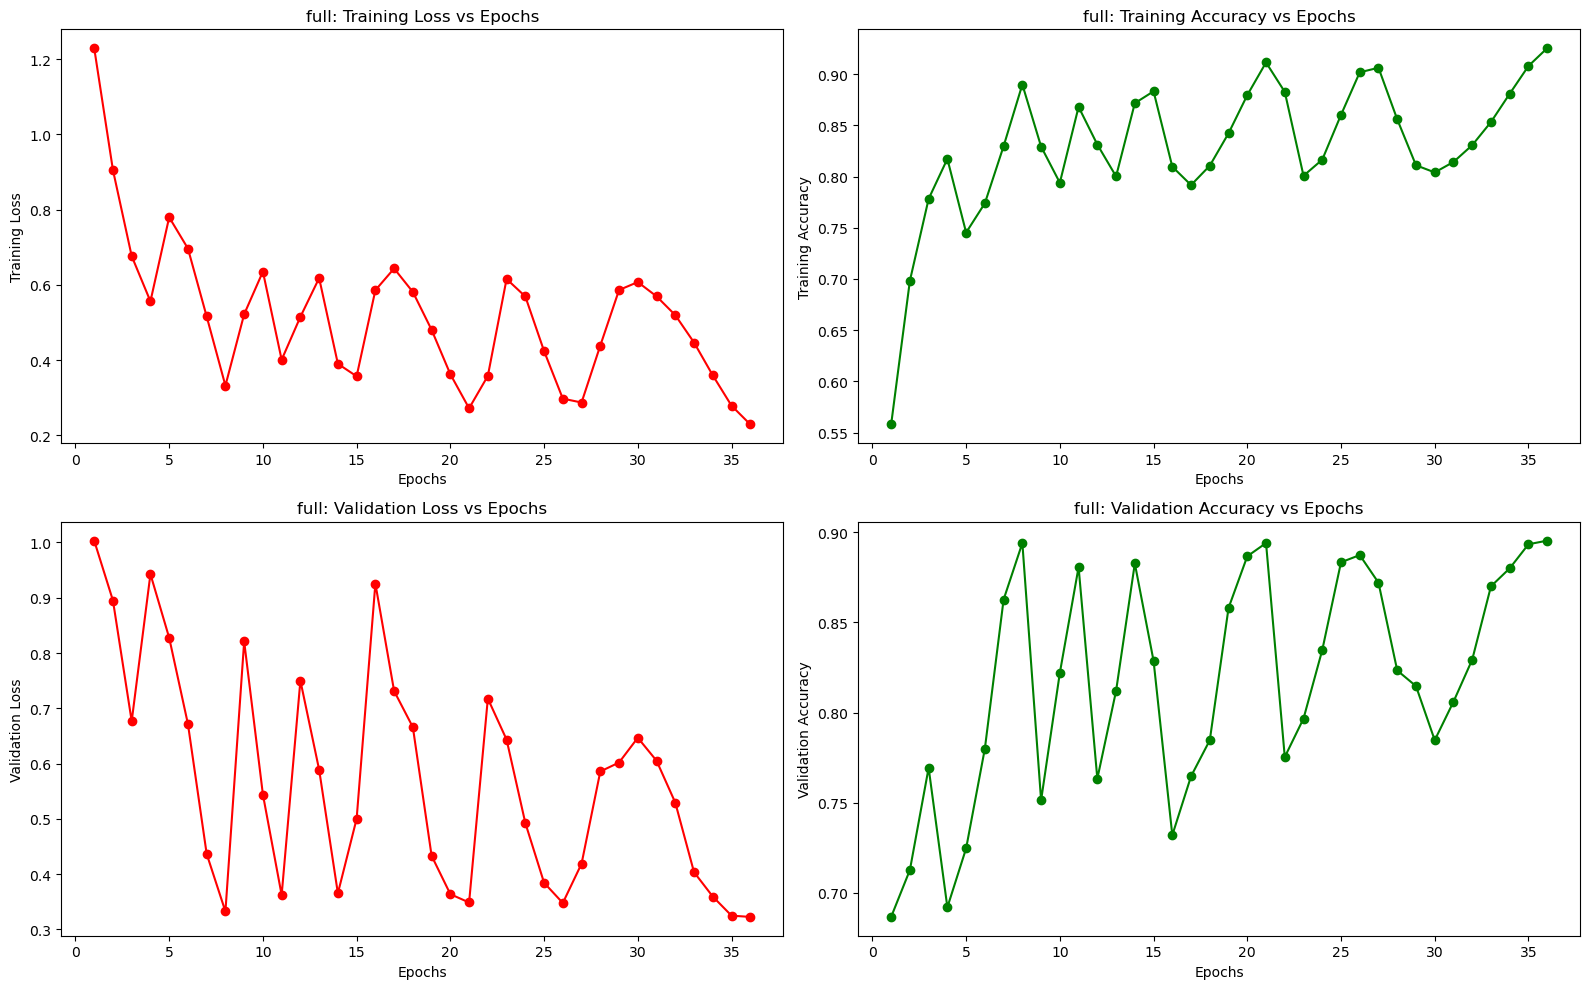

In [45]:
plot_model_training_stats(full_experiment, full_epoch_numbers, full_training_losses, full_validation_losses, full_training_accuracy, full_validation_accuracy)

# <u>Experiment 2: 1 instance per class dataset</u>

### 1.1 Train the model

### 1.2 Test the model

### 1.3 Plot graphs

# <u>Experiment 3: 10 instance per class dataset</u>

### 1.1 Train the model

### 1.2 Test the model


### 1.3 Plot graphs

# <u>Experiment 4: 100 instance per class dataset</u>

### 1.1 Train the model

### 1.2 Test the model

### 1.3 Plot graphs

# <u>Experiment 5: 1000 instance per class dataset</u>

### 1.1 Train the model

### 1.2 Test the model

### 1.3 Plot graphs

# <u> INTERPRETATION </u>